# Desafio Frexco

In [119]:
# Importando bibliotecas que seram utilizada para esse desafio

# Importando biblioteca para análise dos dados
import pandas as pd
import numpy as np

# Biblioteca para visualização dos dados
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA

import seaborn as sns

In [120]:
# Lendo o arquivo com pandas
df = pd.read_excel('Dados.xlsx', engine='openpyxl')

# Visualizando a base de dados
df.head

<bound method NDFrame.head of          Data  Vendas
0  2022-12-06     870
1  2022-12-07     868
2  2022-12-08    1189
3  2022-12-09     742
4  2022-12-10     317
5  2022-12-11     685
6  2022-12-12    1366
7  2022-12-13    1213
8  2022-12-14    1055
9  2022-12-15    1343
10 2022-12-16     832
11 2022-12-17     240
12 2022-12-18     235
13 2022-12-19    1050
14 2022-12-20     711
15 2022-12-21     745
16 2022-12-22    1009
17 2022-12-23      18
18 2022-12-24      40
19 2022-12-25      67
20 2022-12-26     821
21 2022-12-27     572
22 2022-12-28     429
23 2022-12-29     638
24 2022-12-30     106
25 2022-12-31      54
26 2023-01-01     144
27 2023-01-02     814
28 2023-01-03     679
29 2023-01-04     712
30 2023-01-05    1229
31 2023-01-06     821
32 2023-01-07     319
33 2023-01-08     317
34 2023-01-09    1317
35 2023-01-10     807
36 2023-01-11     923
37 2023-01-12    1265
38 2023-01-13     892
39 2023-01-14     289
40 2023-01-15     566
41 2023-01-16    1692
42 2023-01-17    1097
43

In [121]:
# Verificando o tamanho do arquivo
df.shape

(46, 2)

In [122]:
# Verificando se existe campos nulos 
df.isnull().sum()


Data      0
Vendas    0
dtype: int64

In [123]:
# Verificando as informações sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


In [124]:
# Indexando a coluna Data

df.set_index('Data', inplace=True)



## Realizando a previsão com statsmodels Utilizando arima

<AxesSubplot:xlabel='Data'>

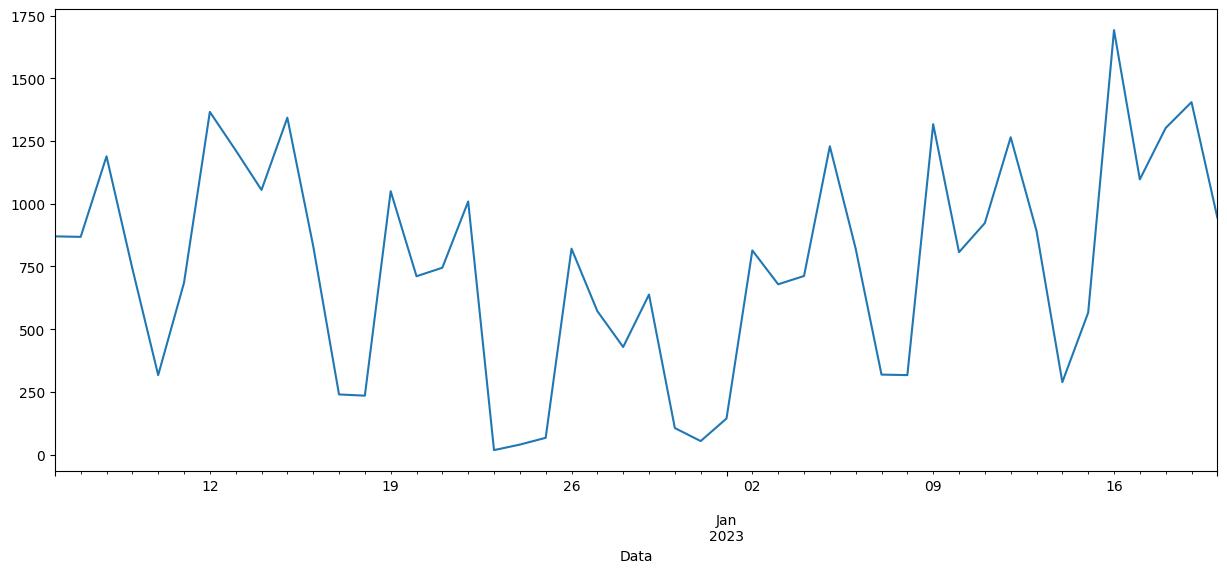

In [125]:
# realizando a plotagem do grafico

df.Vendas.plot(figsize=(15, 6))

<AxesSubplot:xlabel='Data'>

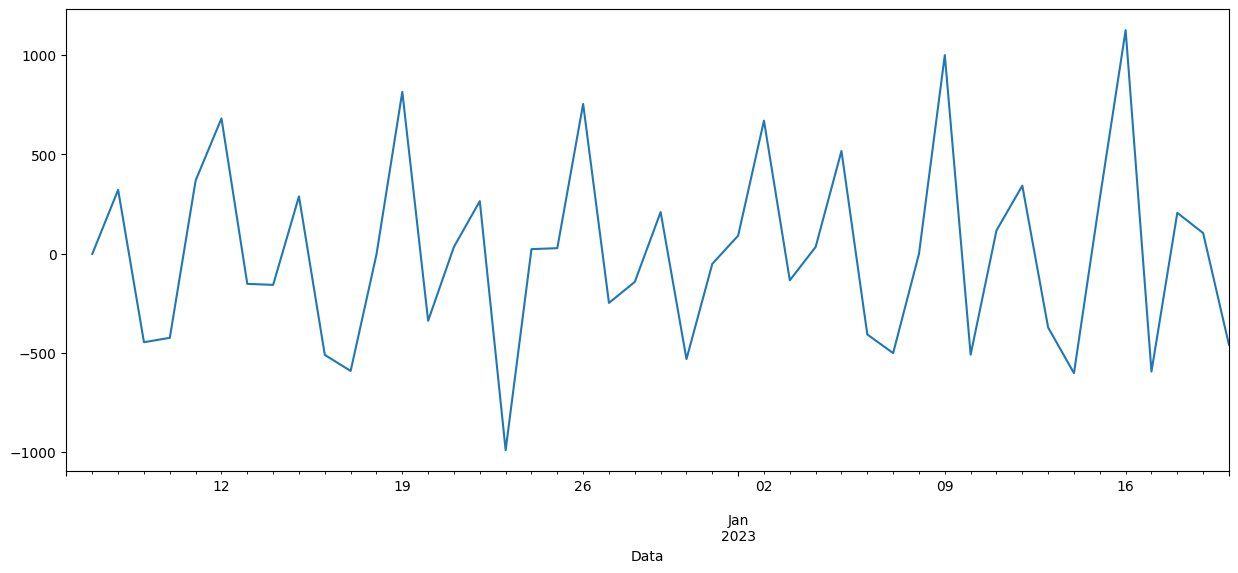

In [126]:
df.Vendas.diff().plot(figsize=(15,6))

In [127]:
# Verificando quantidade de error quadraticos
arima = ARIMA(df.Vendas, freq='D', order=(60, 1, 2)).fit()
(arima.resid ** 2).mean()

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


59881.981359548125

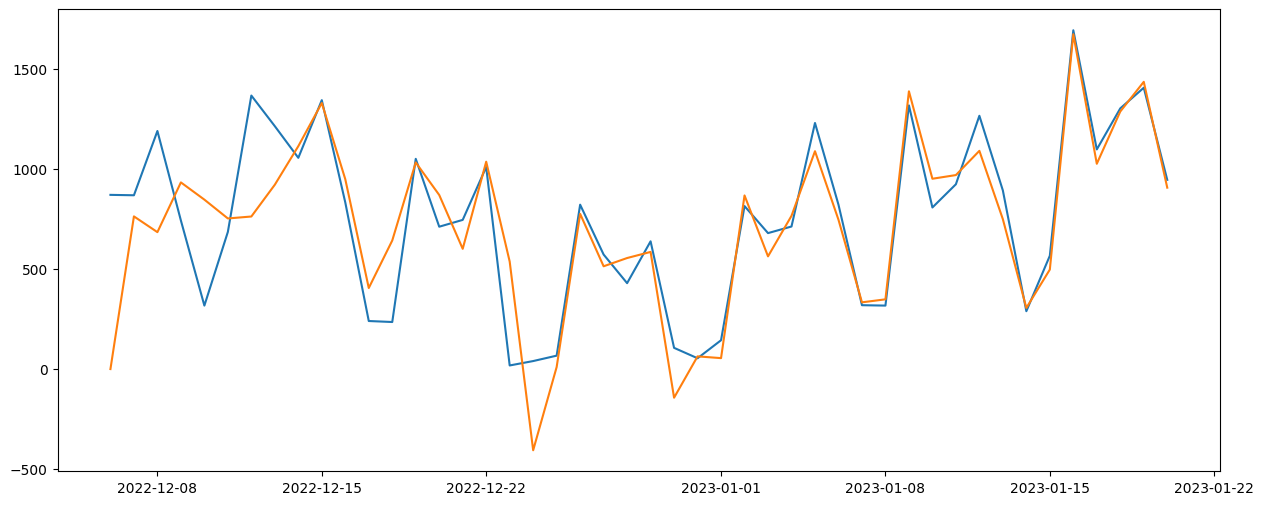

In [128]:
# Plotando a análise da previsão com valores reais
plt.figure(figsize=(15, 6))
plt.plot(df.Vendas)
plt.plot(arima.predict(typ='levels'))

In [129]:
# Realizando a previsão dos proximos 5 dias
arima.forecast(5)

2023-01-21     591.847178
2023-01-22     588.001832
2023-01-23    1483.564512
2023-01-24    1141.450840
2023-01-25    1169.080724
Freq: D, Name: predicted_mean, dtype: float64

### Realizando o previsões com variaveis exógenas



In [130]:
p = 3

df1 = df

for i in range(p):
    df1[f'x_{i + 1}'] = df1.Vendas.shift(i + 1)

# Eliminando os valores em branco
df.dropna(axis=0, inplace=True)
df1.head()

,Vendas,x_1,x_2,x_3
Data,,,,
2022-12-09,742,1189.0,868.0,870.0
2022-12-10,317,742.0,1189.0,868.0
2022-12-11,685,317.0,742.0,1189.0
2022-12-12,1366,685.0,317.0,742.0
2022-12-13,1213,1366.0,685.0,317.0


In [131]:
#input
X = df1.drop('Vendas', axis=1)

# Outputs
y = df1.Vendas


In [132]:
# Importando biblioteca para modelo de regressão baseado em árvore de decisão

from sklearn.tree import DecisionTreeRegressor


In [133]:
reg = DecisionTreeRegressor()

# Ajustando o modelo pra arvore de decisão
reg.fit(X, y)

DecisionTreeRegressor()

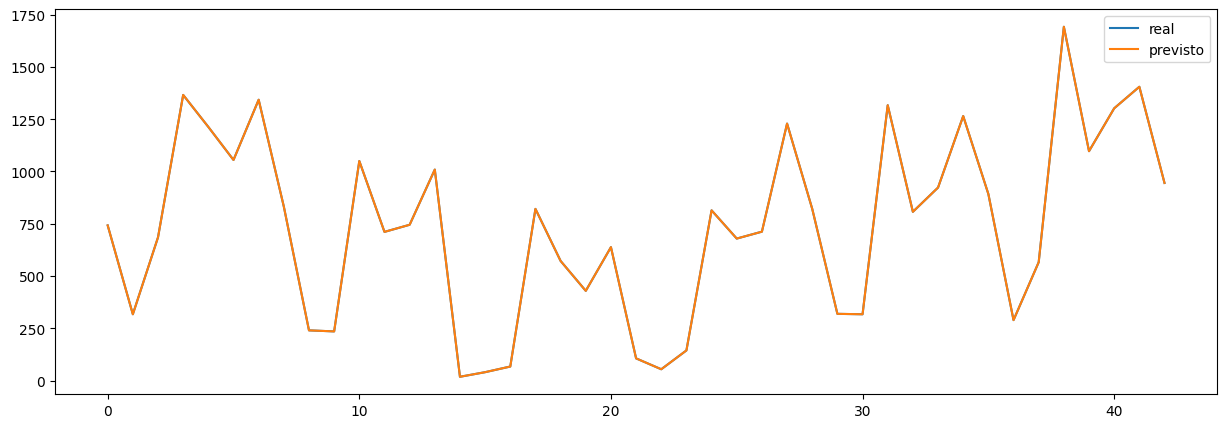

In [134]:
reg = DecisionTreeRegressor(max_depth=10)
reg.fit(X, y)
plt.figure(figsize=(15, 5))
plt.plot(df.Vendas.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [135]:
# Acrescentando mais uma coluna de dia no meu dataframe

df1['Day'] = df1.index.day
df1.head()

,Vendas,x_1,x_2,x_3,Day
Data,,,,,
2022-12-09,742,1189.0,868.0,870.0,9
2022-12-10,317,742.0,1189.0,868.0,10
2022-12-11,685,317.0,742.0,1189.0,11
2022-12-12,1366,685.0,317.0,742.0,12
2022-12-13,1213,1366.0,685.0,317.0,13


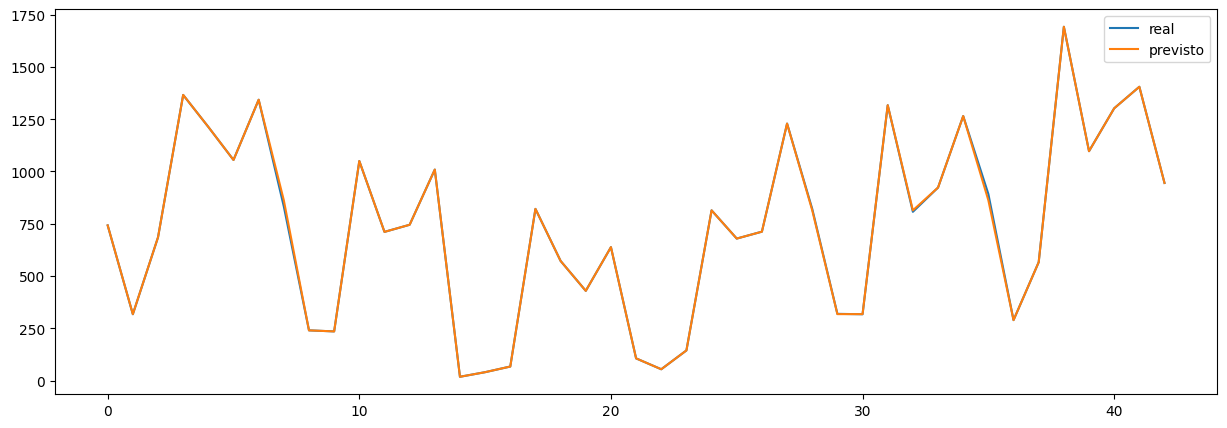

In [136]:
# Considerando os dias

#input
X = df1.drop('Vendas', axis=1)

# Outputs
y = df1.Vendas

reg = DecisionTreeRegressor(max_depth=8)
reg.fit(X, y)

plt.figure(figsize=(15, 5))
plt.plot(df.Vendas.values)
plt.plot(reg.predict(X))
plt.legend(['real', 'previsto'])

In [145]:
# Realizando treinamento e teste

train_size = int(len(X) * 2/3)
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

reg = DecisionTreeRegressor(max_depth=4)
reg.fit(X_train, y_train)

# Avaliando a qualidade do modelo de regressão 
((y_test - reg.predict(X_test)) ** 2).mean()

115100.90666666668